In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable, axes_size
from matplotlib.colors import ListedColormap


Starting process. This operation might take a few seconds.

There are 1000 color matrices of shape (600,4)


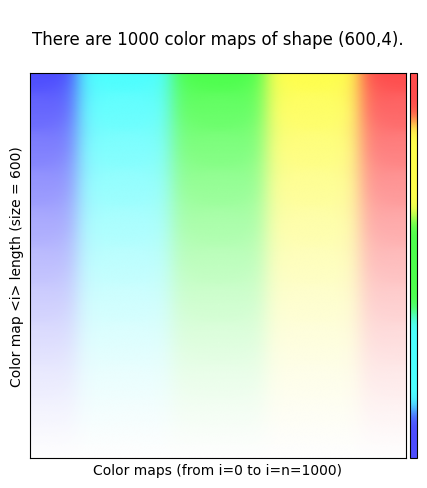

In [1]:
from modules.colormaps import create_custom_colormatrix_3D, lerp
from modules.plot_utils import create_cmap, get_all_cmaps
from modules.interpolation import create_custom_colormatrix_2D
from modules.plots import show_all_available_colormaps, show_individual_example

print("\nStarting process. This operation might take a few seconds.\n")
ReBaD_color_matrix_upper = create_custom_colormatrix_3D(n_cmaps=1000, cmap_length=600)

all_colormaps = get_all_cmaps(ReBaD_color_matrix_upper)
show_all_available_colormaps(ReBaD_color_matrix_upper, all_colormaps)

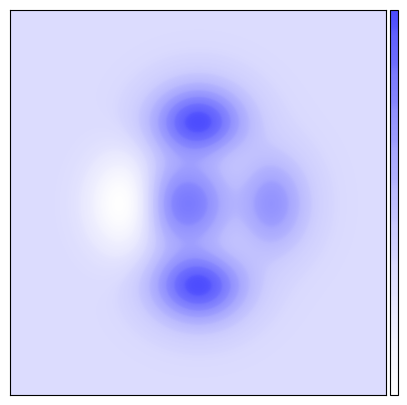

In [7]:
color_map_i = 1
color_map = ListedColormap(ReBaD_color_matrix_upper[:, color_map_i, :][::-1])
f, ax = plt.subplots(figsize= (5,5))
show_individual_example(color_map, ax)

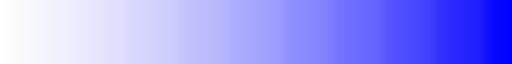

In [8]:
color_map

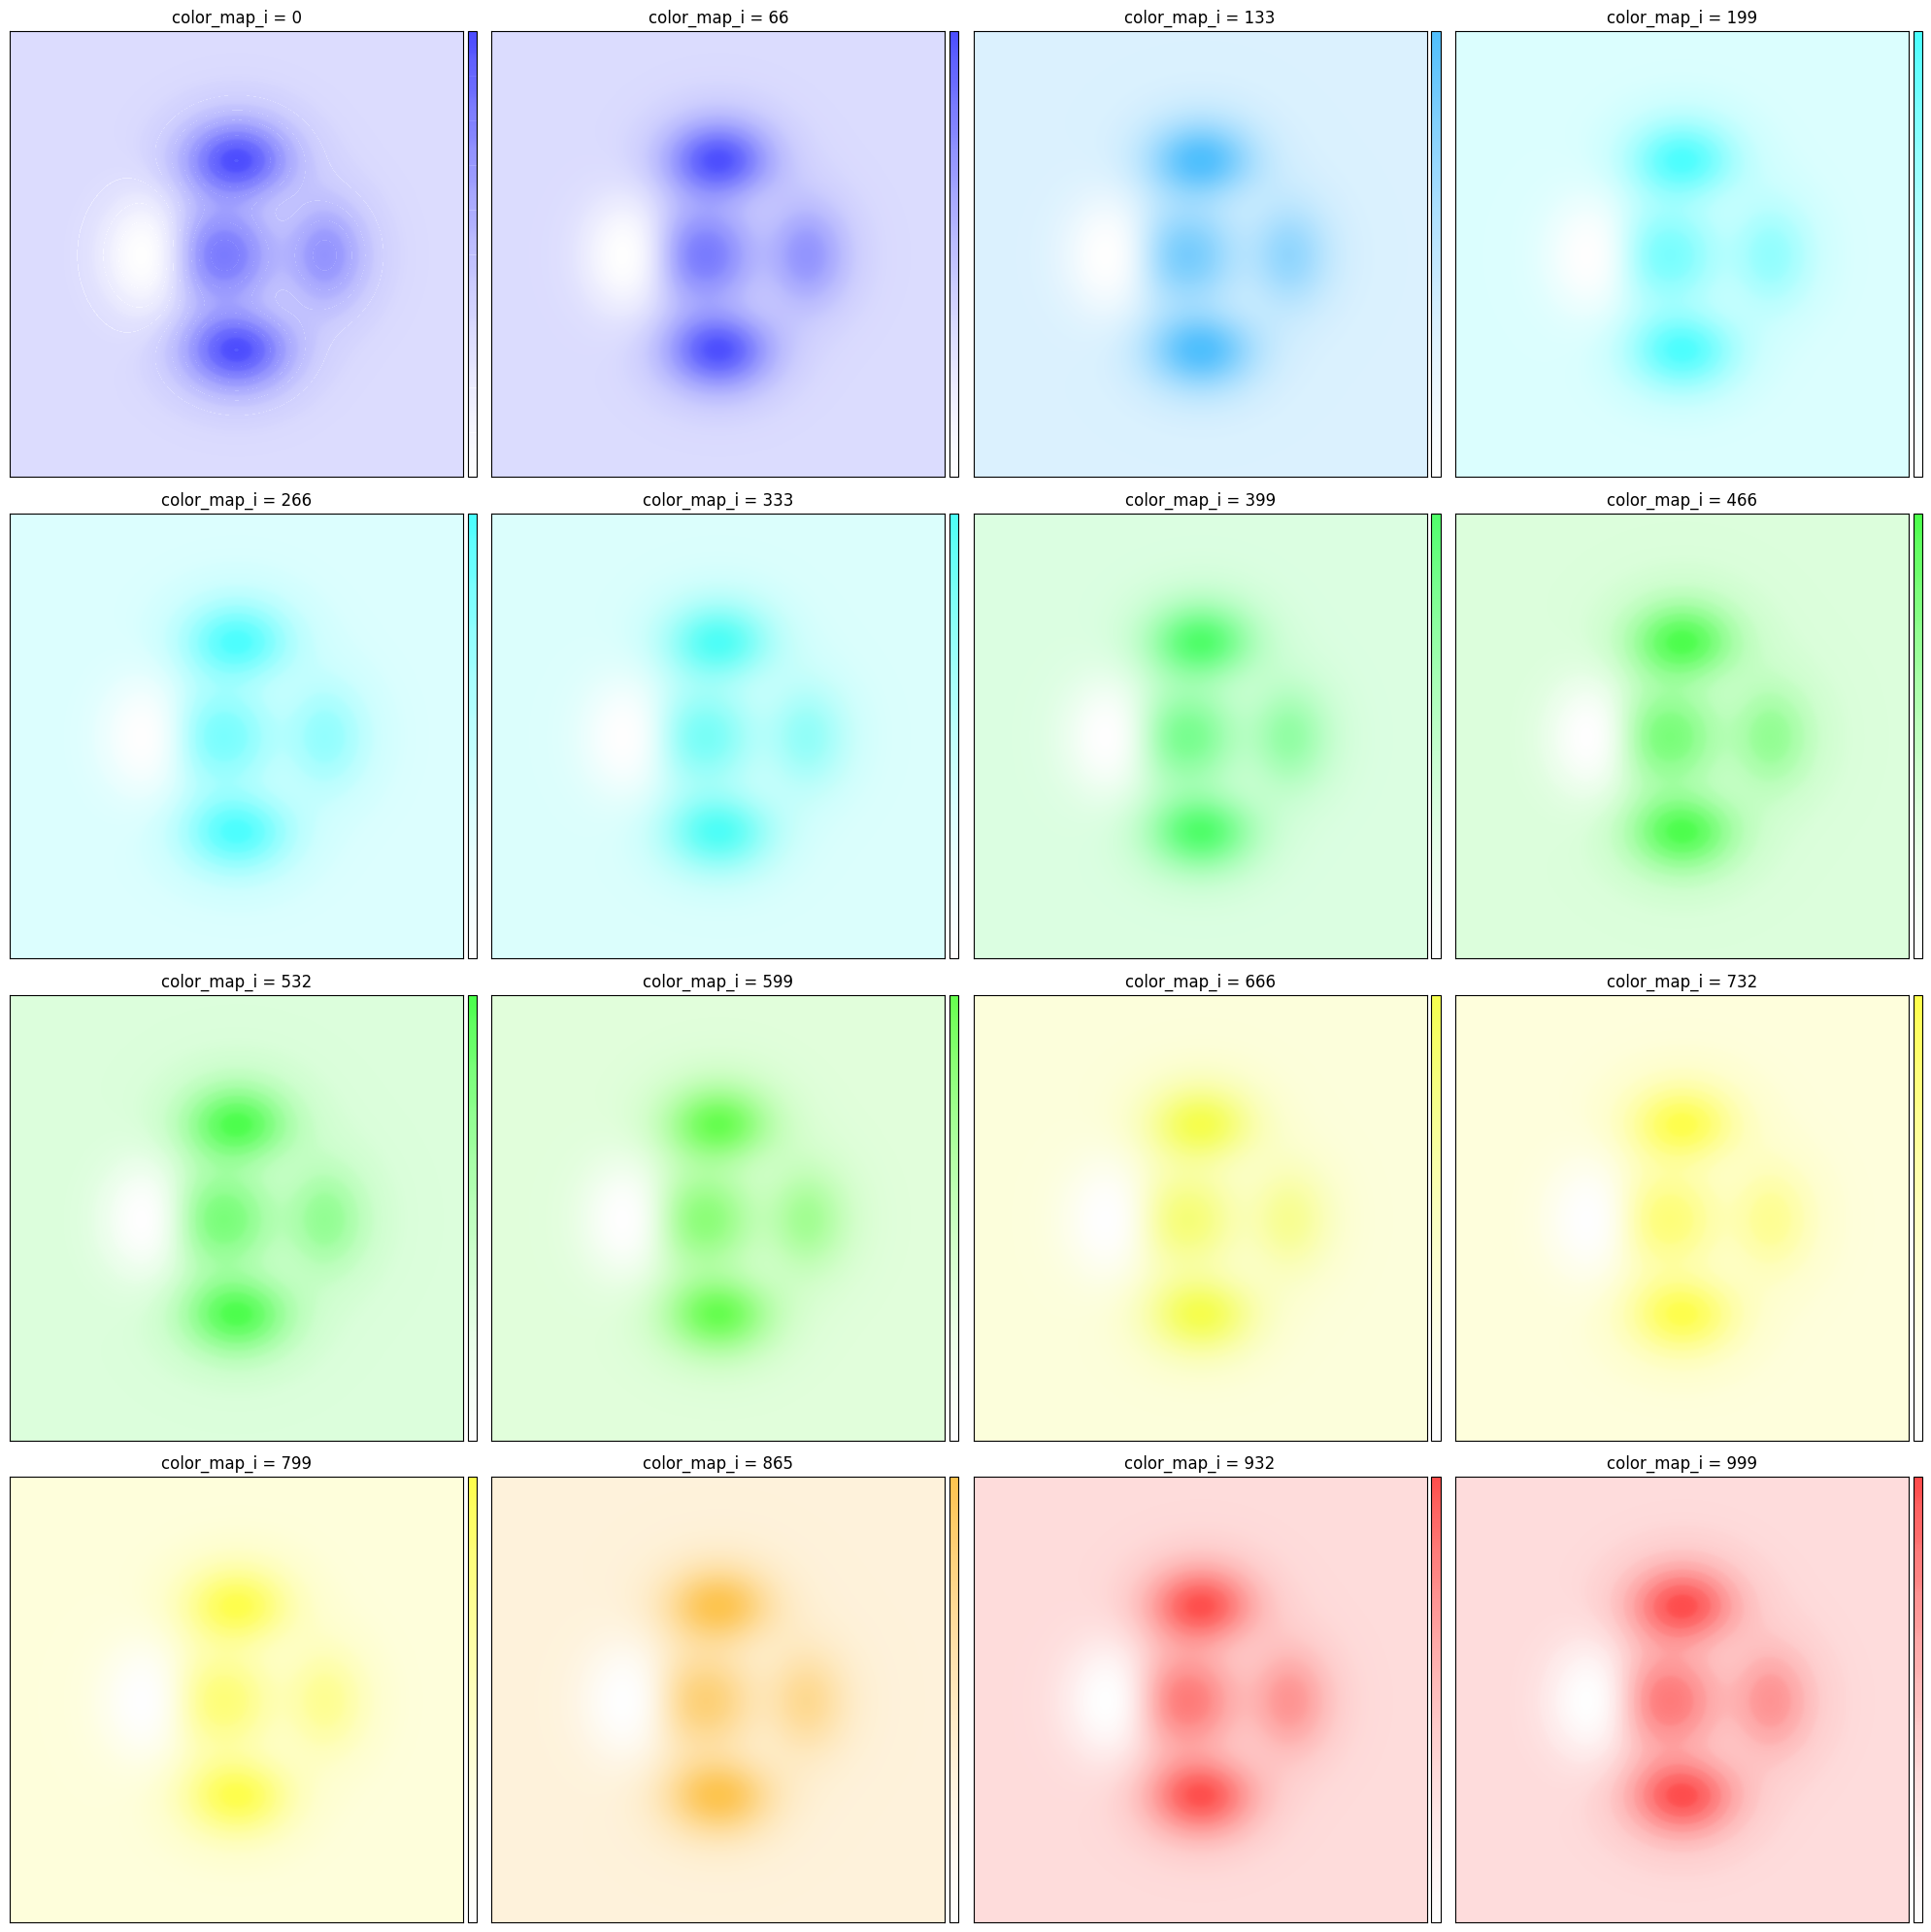

In [3]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))
color_map_indices = np.linspace(0, 999, 16, dtype=int)

for ax, color_map_i in zip(axes.flat, color_map_indices):
    color_map = ListedColormap(ReBaD_color_matrix_upper[:, color_map_i, :][::-1])
    show_individual_example(color_map, ax)
    ax.set_title(f'color_map_i = {color_map_i}')

plt.tight_layout()
plt.show()

In [10]:
# Create a custom color matrix
colormatrix = create_custom_colormatrix_2D(cmap_length=600)

# Duplicate the color matrix to create the lower half of the 3D color matrix
ReBaD_color_matrix_lower = np.tile(colormatrix, (ReBaD_color_matrix_upper.shape[1], 1, 1))
ReBaD_color_matrix_lower = np.swapaxes(ReBaD_color_matrix_lower, 0, 1)
ReBaD_color_matrix_lower = np.rot90(ReBaD_color_matrix_lower, 2)

Created an image (gray-black-gray-white) with shape: (640, 4).


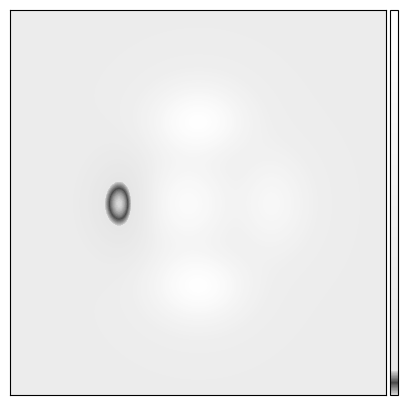

In [9]:
color_map = ListedColormap(colormatrix)
f, ax = plt.subplots(figsize= (5,5))
show_individual_example(color_map, ax)

ReBaD_color_matrix_upper shape: (600, 1000, 4)
ReBaD_color_matrix_lower shape: (640, 1000, 4)


[]

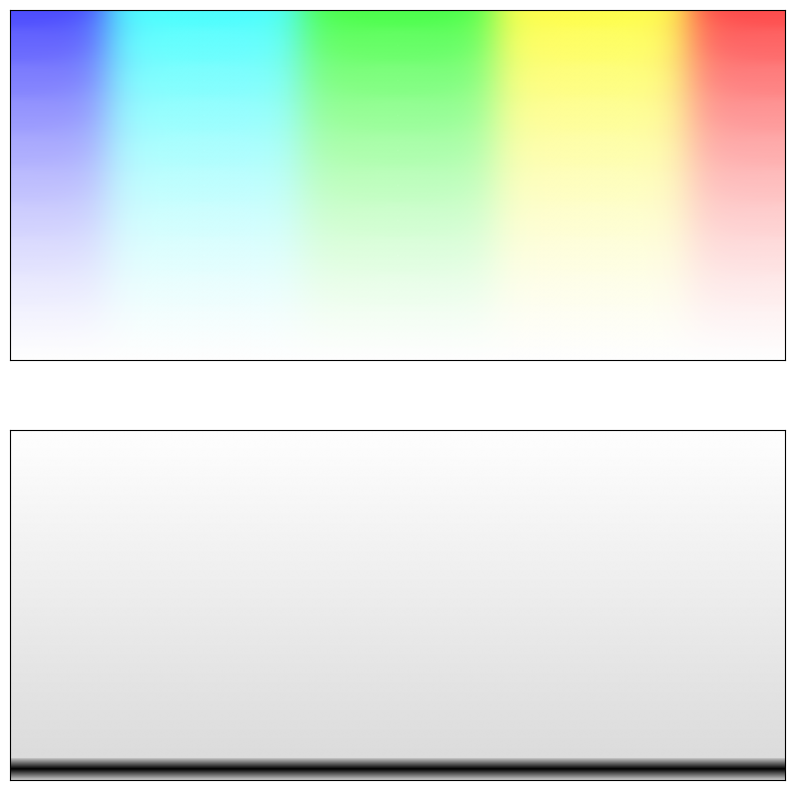

In [11]:
### Plot the two color matrices
ReBaD_color_matrix_upper = np.array(ReBaD_color_matrix_upper)
print(f"ReBaD_color_matrix_upper shape: {ReBaD_color_matrix_upper.shape}")
print(f"ReBaD_color_matrix_lower shape: {ReBaD_color_matrix_lower.shape}")

### Create figure
f, ax = plt.subplots(nrows=2, figsize= (10,10))

### Plot 3D color matrix
ax[0].imshow(ReBaD_color_matrix_upper, cmap = all_colormaps, alpha = 0.7, 
           interpolation = 'bilinear', aspect = "auto")
ax[0].set_yticks([])
ax[0].set_xticks([])

### Plot 2D color matrix
ax[1].imshow(ReBaD_color_matrix_lower,aspect="auto",cmap=color_map)
ax[1].set_yticks([])
ax[1].set_xticks([])

In [5]:
ReBaD_color_matrix_full = [] #combined_color_matrices
ReBaD_color_maps_list = [] #combined_color_maps

for i, w in enumerate(np.arange(0,ReBaD_color_matrix_upper.shape[1])):

    cmatrix_dict = {"r": ReBaD_color_matrix_upper[:, w, :][::-1][:, 0],
                    "g": ReBaD_color_matrix_upper[:, w, :][::-1][:, 1],
                    "b": ReBaD_color_matrix_upper[:, w, :][::-1][:, 2]}
    color_matrix, color_map = create_cmap(cmatrix_dict, combine_two_cmaps=True)
    
    ReBaD_color_matrix_full.append(color_matrix)
    ReBaD_color_maps_list.append(color_map)
    
ReBaD_color_matrix_full = np.array(ReBaD_color_matrix_full)
ReBaD_color_maps_array = np.array(ReBaD_color_maps_list)

print(f"color matrix shape: {ReBaD_color_matrix_full.shape}.")
print(f"corresponding to {ReBaD_color_matrix_full.shape[0]} color maps of length {ReBaD_color_matrix_full.shape[1]}.")   

color matrix shape: (1000, 1240, 4).
corresponding to 1000 color maps of length 1240.


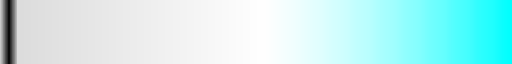

In [12]:
ReBaD_color_maps_array[200]

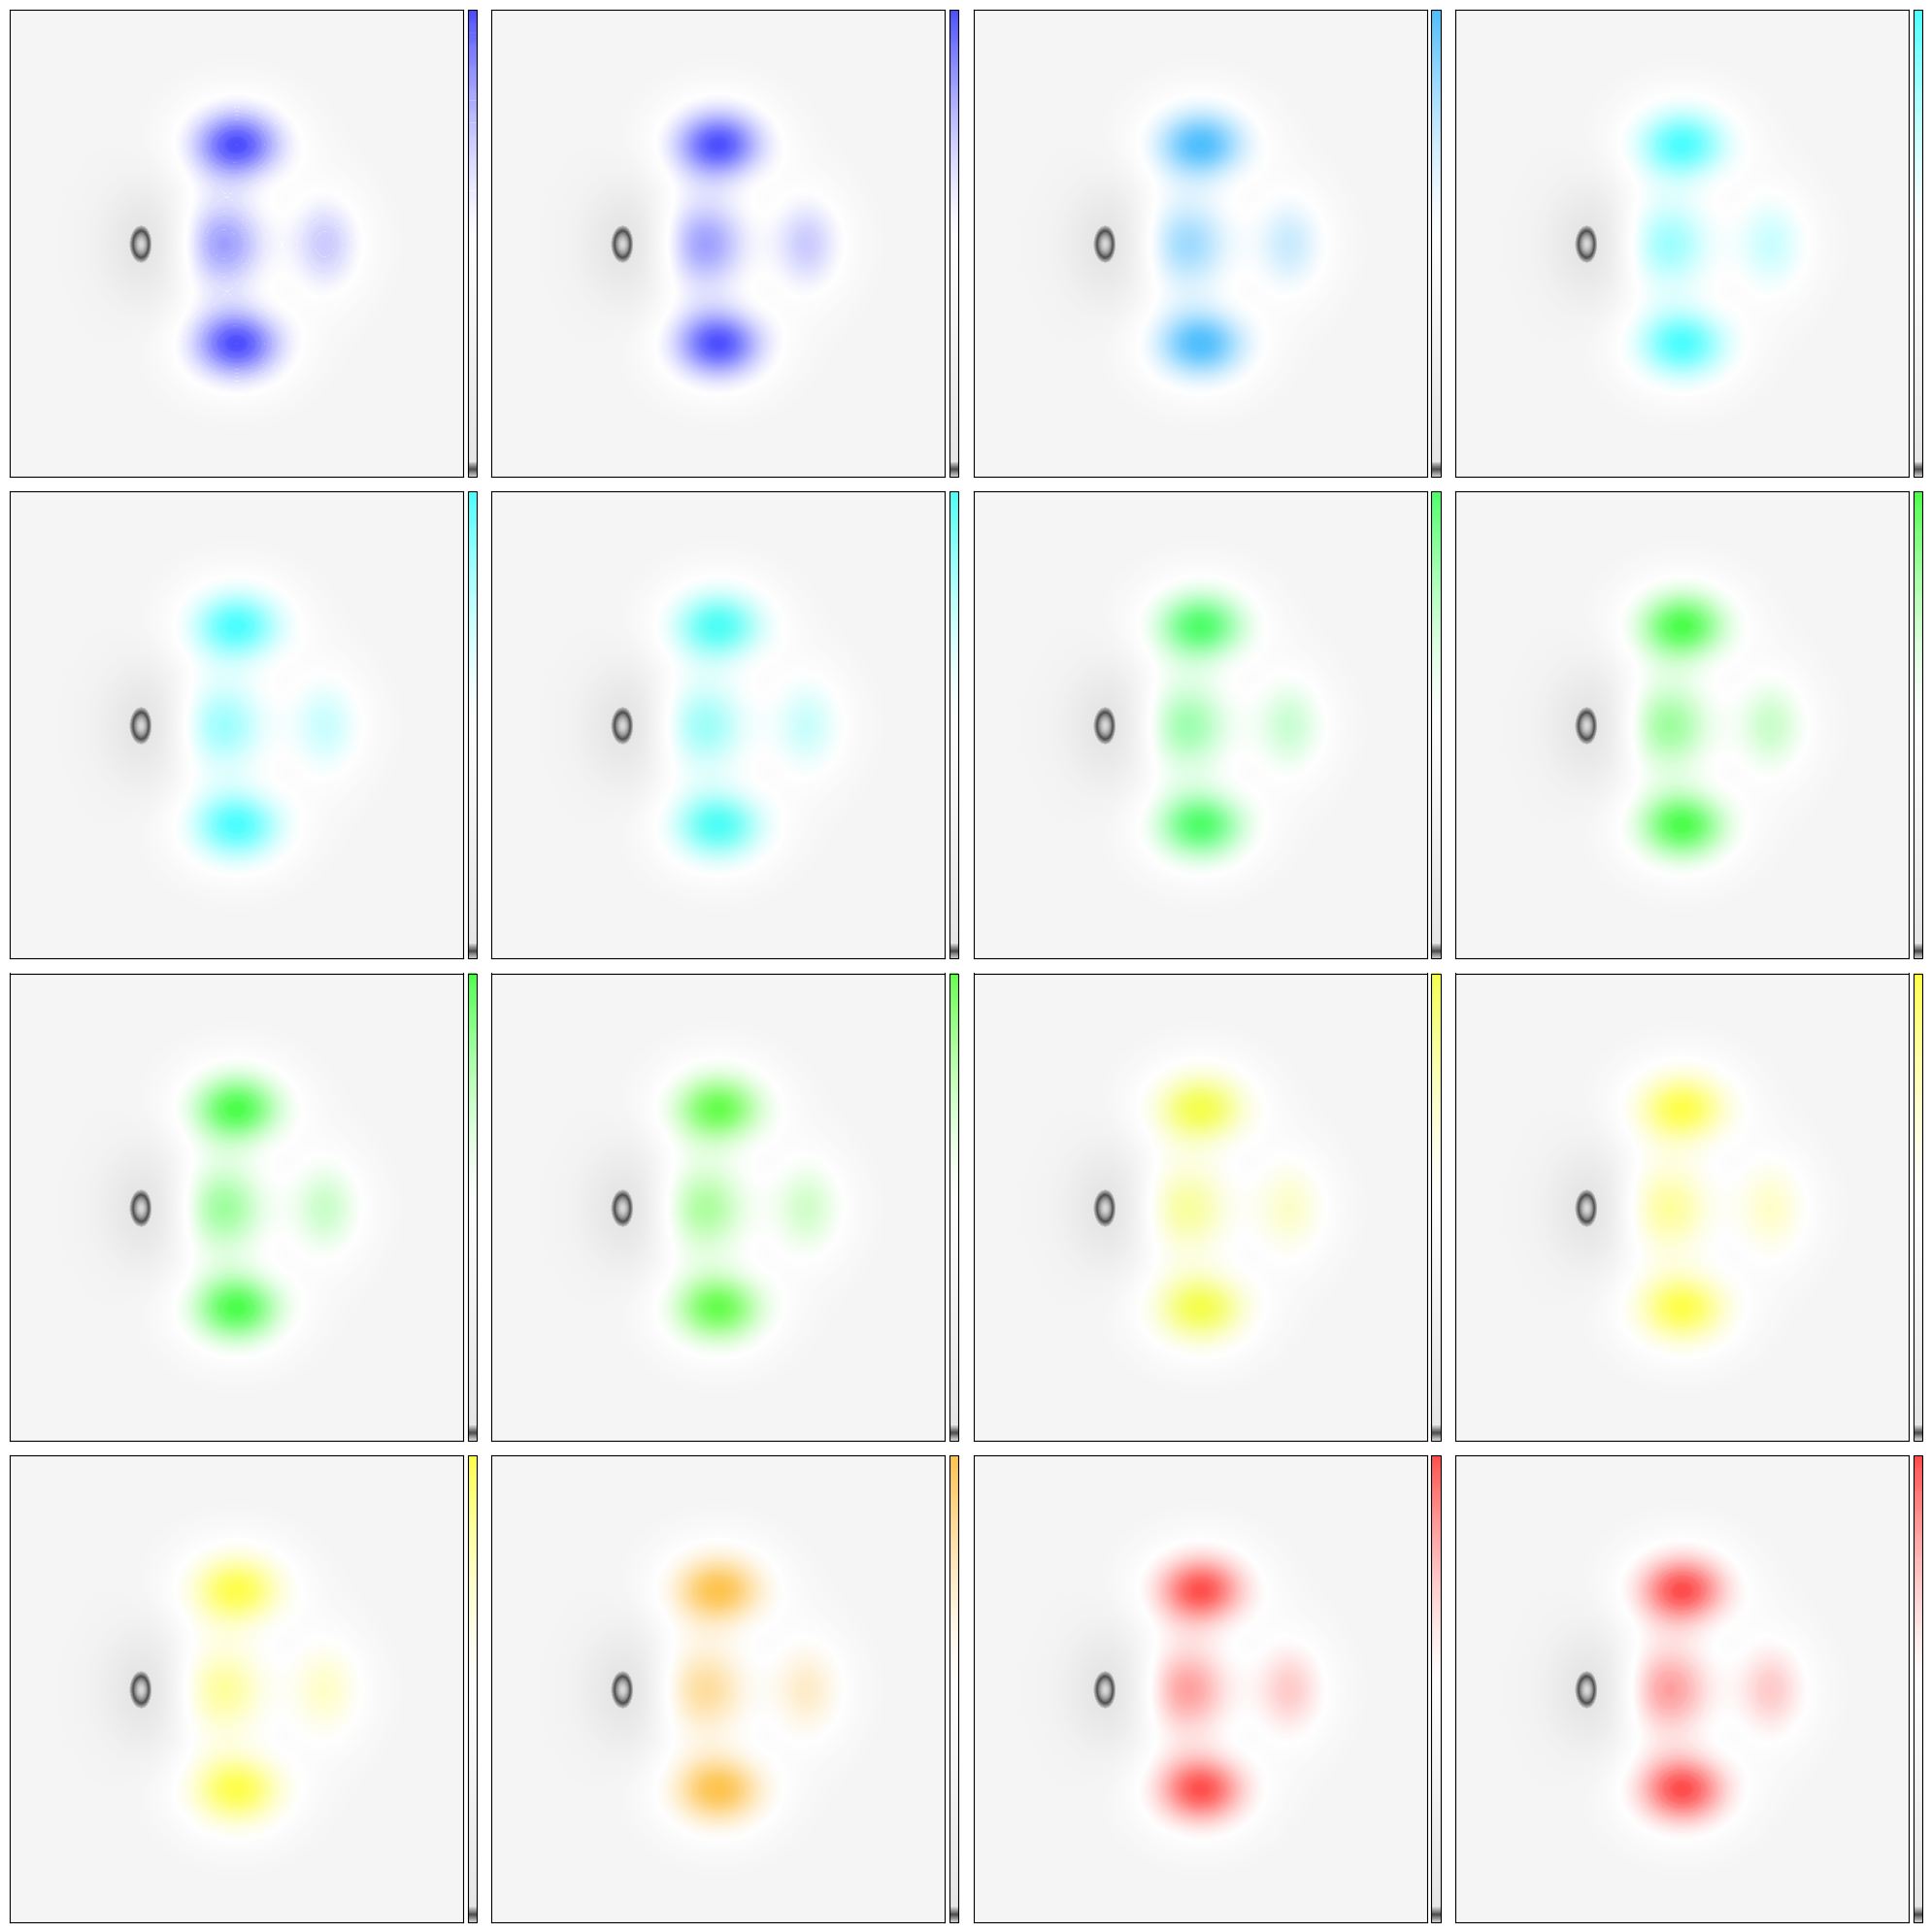

In [6]:
fig, axes = plt.subplots(4, 4, figsize=(20, 20))

indices = np.linspace(0, ReBaD_color_matrix_full.shape[0] - 1, 16, dtype=int)

for i, w in enumerate(indices):
    row, col = divmod(i, 4)
    show_individual_example(ReBaD_color_maps_list[w], axes[row, col])
    if row == 3 and col == 3:
        break

plt.tight_layout()
plt.show()